In [1]:
import brightway2 as bw

In [2]:
bw.projects.set_current('Dimension reduction')

In [3]:
eidb = bw.Database("ecoinvent 3.6 cutoff")
random_act = eidb.random()
random_act

'electricity voltage transformation from high to medium voltage' (kilowatt hour, CN-CSG, None)

In [4]:
lca = bw.LCA({random_act: 1}, method=('IPCC 2013', 'climate change', 'GWP 100a'))
lca.lci()
lca.lcia()

In [5]:
bio = bw.Database("biosphere3")

In [6]:
from collections import defaultdict
from pyprind import prog_bar
import numpy as np
from scipy import sparse

In [12]:
vectors = {}

In [13]:
for ds in prog_bar(eidb):
    lca.redo_lcia({ds: 1})
    if not lca.score:
        continue
    vectors[lca.activity_dict[ds.key]] = np.ravel((lca.inventory.copy()).sum(axis=1))

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:07:48


In [14]:
len(vectors)

17313

In [15]:
import pandas as pd
df = pd.DataFrame(vectors)

In [16]:
# make the dict as a dataframe
# make the activity id as the index
df_new = df.T.copy()
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076
15248,1.117401e-12,7.633029e-14,8.549791e-12,3.422291e-10,7.513971e-14,6.865469e-10,3.259836e-13,3.911235e-16,1.749731e-13,3.811443e-09,...,0.000018,2.746647e-06,1.607540e-10,1.662867e-10,1.980911e-11,0.000050,7.318315e-07,0.000062,3.162833e-05,1.870613e-07
7350,-5.566718e-14,-3.339429e-15,-2.609570e-14,-4.411731e-11,-3.494940e-15,-2.081376e-12,-1.187685e-14,-8.161399e-18,-8.184882e-15,-6.115289e-10,...,-0.000007,-9.563066e-07,-4.096544e-11,-3.028323e-11,-5.315958e-12,-0.000002,-4.805800e-09,-0.000002,-6.865177e-07,-7.964157e-09
3113,2.000249e-13,2.779753e-14,3.373745e-13,6.097781e-11,2.853326e-14,2.591475e-11,9.184103e-14,7.707328e-16,6.739387e-14,1.729473e-09,...,0.000008,1.226390e-06,4.193456e-10,6.576740e-10,4.644917e-11,0.000142,4.359174e-08,0.000313,2.754628e-06,1.959390e-06
10248,1.708710e-11,8.056718e-13,2.917230e-11,2.369161e-09,8.374829e-13,2.457700e-09,2.650729e-12,4.439483e-13,1.991346e-12,6.549222e-07,...,0.000302,4.285677e-05,4.362297e-09,5.446344e-09,5.152411e-10,0.000699,9.475800e-07,0.002040,4.343446e-05,6.671926e-06
16558,1.968136e-12,1.030417e-13,4.126501e-13,1.407792e-09,1.082695e-13,2.829889e-11,3.550307e-13,1.965291e-16,2.547160e-13,2.852155e-08,...,0.000036,5.193956e-06,8.545060e-10,6.426016e-10,1.105616e-10,0.000022,1.636617e-07,0.000059,2.378755e-05,3.081829e-07


In [17]:
import matplotlib.pyplot as plt

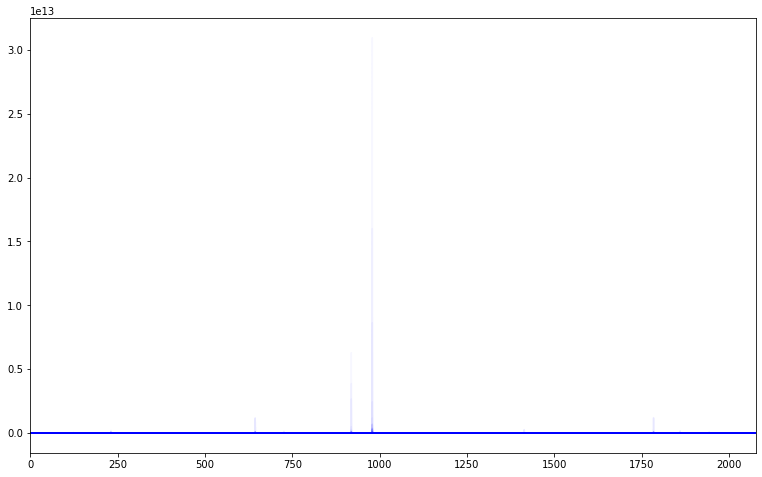

In [18]:
df_new.T.plot(figsize = (13,8), legend = False, 
                    color = 'blue', alpha = 0.03)

In [19]:
df_new.to_csv('all_activities_inventory_all_bioflows.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('all_activities_inventory_all_bioflows.csv')
df_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076
0,15248,1.117401e-12,7.633029e-14,8.549791e-12,3.422291e-10,7.513971e-14,6.865469e-10,3.259836e-13,3.911235e-16,1.749731e-13,...,0.000018,2.746647e-06,1.607540e-10,1.662867e-10,1.980911e-11,0.000050,7.318315e-07,0.000062,3.162833e-05,1.870613e-07
1,7350,-5.566718e-14,-3.339429e-15,-2.609570e-14,-4.411731e-11,-3.494940e-15,-2.081376e-12,-1.187685e-14,-8.161399e-18,-8.184882e-15,...,-0.000007,-9.563066e-07,-4.096544e-11,-3.028323e-11,-5.315958e-12,-0.000002,-4.805800e-09,-0.000002,-6.865177e-07,-7.964157e-09
2,3113,2.000249e-13,2.779753e-14,3.373745e-13,6.097781e-11,2.853326e-14,2.591475e-11,9.184103e-14,7.707328e-16,6.739387e-14,...,0.000008,1.226390e-06,4.193456e-10,6.576740e-10,4.644917e-11,0.000142,4.359174e-08,0.000313,2.754628e-06,1.959390e-06
3,10248,1.708710e-11,8.056718e-13,2.917230e-11,2.369161e-09,8.374829e-13,2.457700e-09,2.650729e-12,4.439483e-13,1.991346e-12,...,0.000302,4.285677e-05,4.362297e-09,5.446344e-09,5.152411e-10,0.000699,9.475800e-07,0.002040,4.343446e-05,6.671926e-06
4,16558,1.968136e-12,1.030417e-13,4.126501e-13,1.407792e-09,1.082695e-13,2.829889e-11,3.550307e-13,1.965291e-16,2.547160e-13,...,0.000036,5.193956e-06,8.545060e-10,6.426016e-10,1.105616e-10,0.000022,1.636617e-07,0.000059,2.378755e-05,3.081829e-07


In [3]:
df_data = df_data.rename(columns={'Unnamed: 0':'Activity'})
df_data = df_data.set_index('Activity')
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076
Activity,,,,,,,,,,,,,,,,,,,,,
15248,1.117401e-12,7.633029e-14,8.549791e-12,3.422291e-10,7.513971e-14,6.865469e-10,3.259836e-13,3.911235e-16,1.749731e-13,3.811443e-09,...,0.000018,2.746647e-06,1.607540e-10,1.662867e-10,1.980911e-11,0.000050,7.318315e-07,0.000062,3.162833e-05,1.870613e-07
7350,-5.566718e-14,-3.339429e-15,-2.609570e-14,-4.411731e-11,-3.494940e-15,-2.081376e-12,-1.187685e-14,-8.161399e-18,-8.184882e-15,-6.115289e-10,...,-0.000007,-9.563066e-07,-4.096544e-11,-3.028323e-11,-5.315958e-12,-0.000002,-4.805800e-09,-0.000002,-6.865177e-07,-7.964157e-09
3113,2.000249e-13,2.779753e-14,3.373745e-13,6.097781e-11,2.853326e-14,2.591475e-11,9.184103e-14,7.707328e-16,6.739387e-14,1.729473e-09,...,0.000008,1.226390e-06,4.193456e-10,6.576740e-10,4.644917e-11,0.000142,4.359174e-08,0.000313,2.754628e-06,1.959390e-06
10248,1.708710e-11,8.056718e-13,2.917230e-11,2.369161e-09,8.374829e-13,2.457700e-09,2.650729e-12,4.439483e-13,1.991346e-12,6.549222e-07,...,0.000302,4.285677e-05,4.362297e-09,5.446344e-09,5.152411e-10,0.000699,9.475800e-07,0.002040,4.343446e-05,6.671926e-06
16558,1.968136e-12,1.030417e-13,4.126501e-13,1.407792e-09,1.082695e-13,2.829889e-11,3.550307e-13,1.965291e-16,2.547160e-13,2.852155e-08,...,0.000036,5.193956e-06,8.545060e-10,6.426016e-10,1.105616e-10,0.000022,1.636617e-07,0.000059,2.378755e-05,3.081829e-07


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
test = df_data.values.copy().T
x = MinMaxScaler().fit_transform(test)
y = test.T[:2]
y_ = MinMaxScaler().fit_transform(y)
test.shape

(2077, 17313)

In [10]:
sc = MinMaxScaler()
x = df_data.values.copy()
X = sc.fit_transform(x)
df_1 = df_data.copy()
for i in range(X.shape[1]):
    df_1[str(i)]=X.T[i]
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076
Activity,,,,,,,,,,,,,,,,,,,,,
15248,0.00013,0.00002,0.000009,0.000173,0.00002,0.000038,0.000021,0.000001,0.000019,0.000134,...,0.000134,0.000135,9.265087e-07,0.000001,9.155792e-07,0.000007,0.000057,0.000012,0.000033,0.000009
7350,0.00013,0.00002,0.000009,0.000173,0.00002,0.000038,0.000021,0.000001,0.000019,0.000134,...,0.000134,0.000135,9.265087e-07,0.000001,9.155792e-07,0.000007,0.000057,0.000012,0.000033,0.000009
3113,0.00013,0.00002,0.000009,0.000173,0.00002,0.000038,0.000021,0.000001,0.000019,0.000134,...,0.000134,0.000135,9.265088e-07,0.000001,9.155793e-07,0.000007,0.000057,0.000012,0.000033,0.000009
10248,0.00013,0.00002,0.000009,0.000173,0.00002,0.000038,0.000021,0.000001,0.000019,0.000134,...,0.000134,0.000135,9.265091e-07,0.000001,9.155795e-07,0.000007,0.000057,0.000012,0.000033,0.000009
16558,0.00013,0.00002,0.000009,0.000173,0.00002,0.000038,0.000021,0.000001,0.000019,0.000134,...,0.000134,0.000135,9.265088e-07,0.000001,9.155793e-07,0.000007,0.000057,0.000012,0.000033,0.000009


In [57]:
col_dict = {}
for i in range(len(df_1.columns)):
    col_dict[df_1.columns[i]]=i
df_1 = df_1.rename(columns = col_dict)
drop_list = []
data = df_1.values.copy()
for i in range(data.shape[1]):
    if df_1[i].sum() == 0 and max(df_1[i]) == 0 and min(df_1[i]) == 0: # drop zero columns
        drop_list.append(i)
len(drop_list)

1

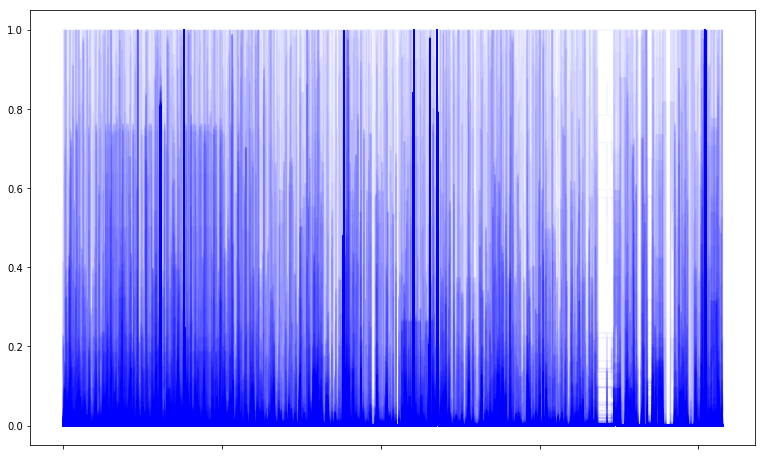

In [11]:
df_1.T.plot(figsize = (13,8), legend = False, 
                    color = 'blue', alpha = 0.03)

In [58]:
df_2 = df_1.drop(columns = drop_list)
df_2.corr()

,0,1,2,3,4,5,6,7,8,9,...,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076
0,1.000000,0.852003,0.666755,0.812904,0.848730,0.746904,0.857176,0.045214,0.845804,0.583389,...,0.890479,0.849759,0.072212,0.081247,0.071190,0.530595,0.541216,0.657833,0.111381,0.117731
1,0.852003,1.000000,0.382744,0.703269,0.999875,0.327522,0.999718,0.032904,0.999547,0.180493,...,0.861880,0.792970,0.095676,0.101974,0.094960,0.419504,0.342556,0.474952,0.076171,0.051529
2,0.666755,0.382744,1.000000,0.669221,0.376006,0.816611,0.385615,0.036477,0.370957,0.454533,...,0.539024,0.569471,0.017403,0.029436,0.016030,0.630212,0.364219,0.913417,0.068085,0.110220
3,0.812904,0.703269,0.669221,1.000000,0.698646,0.542661,0.706341,0.027404,0.694762,0.260007,...,0.882989,0.847547,0.017803,0.027986,0.016655,0.550884,0.339418,0.731777,0.102525,0.073831
4,0.848730,0.999875,0.376006,0.698646,1.000000,0.322071,0.999607,0.032851,0.999686,0.177487,...,0.859471,0.789742,0.092825,0.099005,0.092122,0.412071,0.339579,0.467986,0.075694,0.050564
5,0.746904,0.327522,0.816611,0.542661,0.322071,1.000000,0.336324,0.055616,0.317844,0.743374,...,0.510535,0.527077,0.013592,0.022825,0.012546,0.450031,0.522940,0.666034,0.091546,0.145174
6,0.857176,0.999718,0.385615,0.706341,0.999607,0.336324,1.000000,0.033181,0.999418,0.189896,...,0.867110,0.798402,0.092511,0.099066,0.091770,0.417145,0.345326,0.475978,0.077032,0.052865
7,0.045214,0.032904,0.036477,0.027404,0.032851,0.055616,0.033181,1.000000,0.032798,0.017173,...,0.035040,0.032505,0.002522,0.003063,0.002460,0.013759,0.018378,0.037811,0.013174,0.003076
8,0.845804,0.999547,0.370957,0.694762,0.999686,0.317844,0.999418,0.032798,1.000000,0.175383,...,0.857670,0.786754,0.090736,0.096844,0.090041,0.400809,0.331961,0.461771,0.074695,0.049509
9,0.583389,0.180493,0.454533,0.260007,0.177487,0.743374,0.189896,0.017173,0.175383,1.000000,...,0.268687,0.259086,0.022725,0.026434,0.022303,0.182614,0.498510,0.266050,0.080832,0.144133


In [ ]:
# drop some highly correlated features
corr_mtx = df_2.corr()
corrmtx = corr_mtx.values.copy()
corr_i = []
corr_j = []
for i in range(corr_mtx.shape[0]):
    for j in range(corr_mtx.shape[1]):
        if corrmtx[i,j] > 0.99 and i != j:
            #print (df_2.columns[i],'-',df_2.columns[j])
            corr_i.append(df_2.columns[i])
            corr_j.append(df_2.columns[j])

In [60]:
drop_list = []
for i in range(len(corr_i)):
    if corr_j[i] not in drop_list and corr_i[i] not in drop_list:
        drop_list.append(corr_j[i])
    #elif corr_i[i] == corr_i[i+1]:
    #   drop_list.append(corr_j[i])
len(drop_list)

1427

In [61]:
df_3 = df_2.copy()
df_3 = df_3.drop(columns = drop_list) # drop one column from high correlated pairs 
df_3.head()

,0,1,2,3,5,7,9,10,11,12,...,2047,2048,2050,2052,2057,2060,2067,2068,2073,2076
Activity,,,,,,,,,,,,,,,,,,,,,
15248,0.00013,0.00002,0.000009,0.000173,0.000038,0.000001,0.000134,0.0,0.000686,0.000017,...,0.000022,0.000054,0.000044,0.000016,0.000011,0.000275,0.000134,0.000135,0.000057,0.000009
7350,0.00013,0.00002,0.000009,0.000173,0.000038,0.000001,0.000134,0.0,0.000686,0.000017,...,0.000022,0.000054,0.000044,0.000016,0.000011,0.000275,0.000134,0.000135,0.000057,0.000009
3113,0.00013,0.00002,0.000009,0.000173,0.000038,0.000001,0.000134,0.0,0.000686,0.000017,...,0.000022,0.000054,0.000044,0.000016,0.000011,0.000275,0.000134,0.000135,0.000057,0.000009
10248,0.00013,0.00002,0.000009,0.000173,0.000038,0.000001,0.000134,0.0,0.000686,0.000017,...,0.000022,0.000054,0.000044,0.000016,0.000011,0.000275,0.000134,0.000135,0.000057,0.000009
16558,0.00013,0.00002,0.000009,0.000173,0.000038,0.000001,0.000134,0.0,0.000686,0.000017,...,0.000022,0.000054,0.000044,0.000016,0.000011,0.000275,0.000134,0.000135,0.000057,0.000009


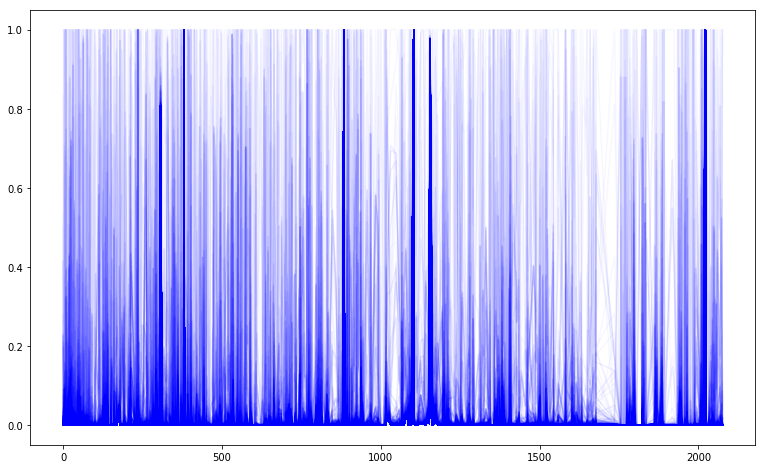

In [62]:
df_3.T.plot(figsize = (13,8), legend = False, 
                    color = 'blue', alpha = 0.03)

In [63]:
# dimensionality reduction
from sklearn.decomposition import PCA

In [64]:
X = df_3.values.copy()
X.shape

(17313, 649)

In [65]:
pca = PCA()
pca.fit(X)
X_prime = pca.transform(X)

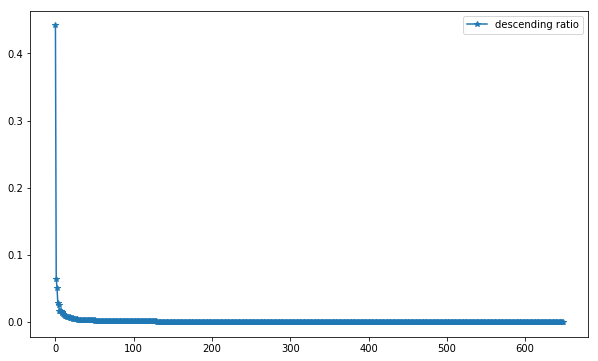

In [66]:
explained_variance_ratio = pca.explained_variance_ratio_
x = [i for i in range(len(explained_variance_ratio))]
y = []
for i in range(1,len(explained_variance_ratio)+1):
    y.append(sum(explained_variance_ratio[:i]))
plt.figure(figsize=(10,6))
#plt.plot(x,y,'o-',label='cumulative ratio')
plt.plot(x,explained_variance_ratio,'*-',label='descending ratio')
plt.legend()
plt.show()

In [70]:
pca_2 = PCA(0.9) # retain 90% of the explained information
pca_2.fit(X)
pca_2.n_components_ 
X_2 = pca_2.transform(X)

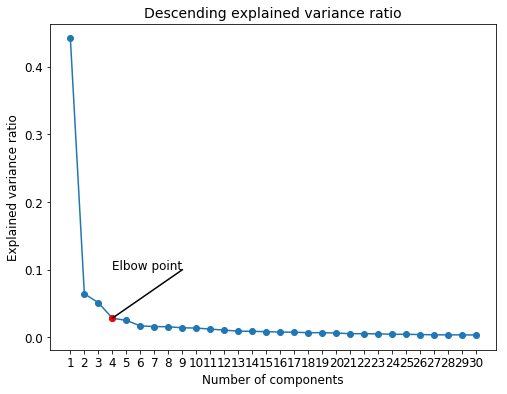

In [68]:
# 'Elbow point' method to choose the number of PCs
y2 = pca.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.plot(x[1:31],y2[:30],'o-')
plt.xticks(np.arange(1, 31, 1),fontsize=12)
plt.yticks(fontsize=12)
plt.title('Descending explained variance ratio',fontsize=14)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained variance ratio',fontsize=12)
plt.plot(4,y2[3],'o',color='red')
plt.plot([4,9],[y2[3],0.1],color = 'black')
plt.text(4,0.1,'Elbow point',fontsize=12)
plt.show()

In [69]:
pca_3 = PCA(n_components = 4)
pca_3.fit(X)
X_3 = pca_3.transform(X)

In [71]:
sum(pca_3.explained_variance_ratio_) # 4 PCs retain about 60% of the variances

0.586010605610353

In [72]:
# dataframe with 90% of the information
df_4 = pd.DataFrame(X_2)
df_4.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,-0.014552,-0.000646,-0.003195,-0.00046,0.000203,-0.000362,-0.000215,-0.001809,-0.000178,-0.00172,...,-0.000235,-0.000094,-0.000422,-0.000085,-0.00038,0.000117,0.000049,-0.000262,-0.000774,-0.000077
1,-0.014552,-0.000646,-0.003195,-0.00046,0.000203,-0.000362,-0.000215,-0.001809,-0.000178,-0.00172,...,-0.000235,-0.000094,-0.000422,-0.000085,-0.00038,0.000117,0.000049,-0.000262,-0.000774,-0.000077
2,-0.014552,-0.000646,-0.003195,-0.00046,0.000203,-0.000362,-0.000214,-0.001809,-0.000178,-0.00172,...,-0.000235,-0.000094,-0.000422,-0.000085,-0.00038,0.000117,0.000049,-0.000262,-0.000774,-0.000077
3,-0.014551,-0.000646,-0.003195,-0.00046,0.000203,-0.000362,-0.000214,-0.001809,-0.000178,-0.00172,...,-0.000235,-0.000094,-0.000422,-0.000085,-0.00038,0.000117,0.000049,-0.000262,-0.000774,-0.000077
4,-0.014552,-0.000646,-0.003195,-0.00046,0.000203,-0.000362,-0.000215,-0.001809,-0.000178,-0.00172,...,-0.000235,-0.000094,-0.000422,-0.000085,-0.00038,0.000117,0.000049,-0.000262,-0.000774,-0.000077


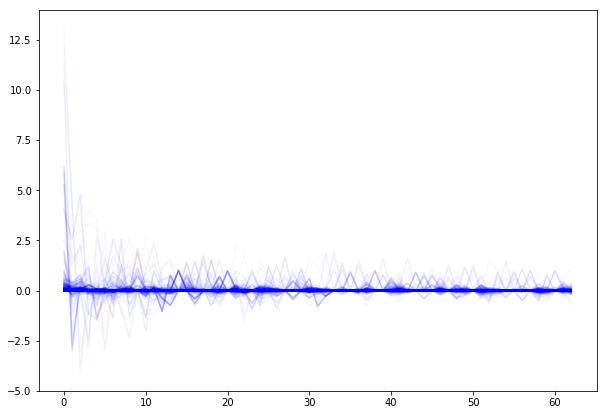

In [73]:
df_4.T.plot(figsize = (10,7), legend = False, 
                    color = 'blue', alpha = 0.03)

In [74]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [75]:
X_dbscan = X_2

db = DBSCAN(eps = 0.1, min_samples = 5).fit(X_dbscan)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_dbscan, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(X_dbscan, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(X_dbscan, labels))

Estimated number of clusters: 26
Estimated number of noise points: 407
Silhouette Coefficient: 0.932
Calinski harabasz score: 96.166
Davies bouldin score: 1.946


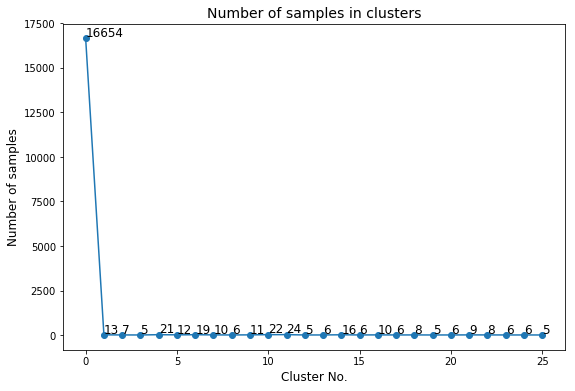

In [76]:
x = [i for i in range(n_clusters_)]
y = [list(labels).count(i) for i in x]
plt.figure(figsize = (9,6))
plt.plot(x,y,'o-')
plt.title('Number of samples in clusters',fontsize = 14)
plt.xlabel('Cluster No.',fontsize = 12)
plt.ylabel('Number of samples',fontsize = 12)
#plt.xticks(np.arange(0, 16, 1))
for i in x:
    plt.text(i,y[i]+100,str(y[i]),fontsize = 12)
plt.show()

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [78]:
X_agglo_ward = X_3
clustering = AgglomerativeClustering(linkage='ward', distance_threshold = 1,compute_full_tree =True, n_clusters = None)
clustering.fit(X_agglo_ward)
labels = clustering.labels_
print (max(labels),'clusetrs')
print (list(labels).count(-1),'outliers')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_agglo_ward, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(X_agglo_ward, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(X_agglo_ward, labels))

25 clusetrs
0 outliers
Silhouette Coefficient: 0.973
Calinski harabasz score: 186478.761
Davies bouldin score: 0.424


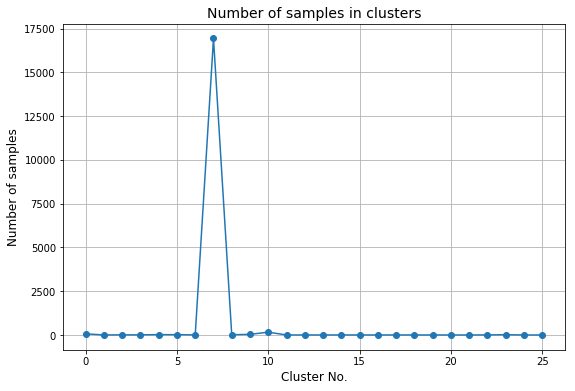

In [79]:
x = [i for i in range(max(labels)+1)]
y = [list(labels).count(i) for i in x]
plt.figure(figsize = (9,6))
plt.plot(x,y,'o-')
plt.title('Number of samples in clusters',fontsize = 14)
plt.xlabel('Cluster No.',fontsize = 12)
plt.ylabel('Number of samples',fontsize = 12)
plt.grid(True)
#plt.xticks(np.arange(0, 70, 1))
plt.show()

In [80]:
pca_4 = PCA(n_components = 3)
pca_4.fit(X)
X_4 = pca_4.transform(X)

In [81]:
x = list(X_4[:,0])
y = list(X_4[:,1])
z = list(X_4[:,2])

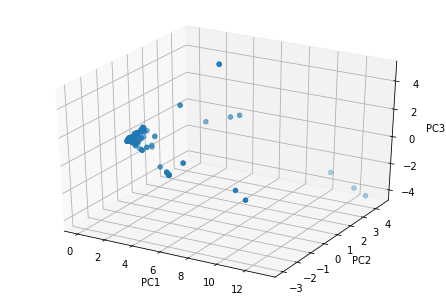

In [82]:
#3d plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker = 'o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

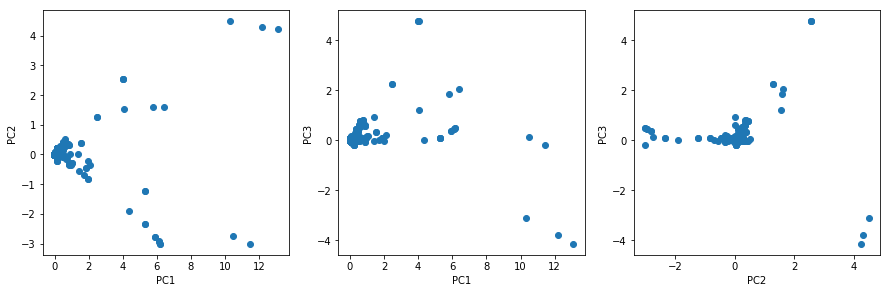

In [83]:
plt.figure(figsize=(15,4.5))
plt.subplot(131)
plt.plot(x,y,'o')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(132)
plt.plot(x,z,'o')
plt.xlabel('PC1')
plt.ylabel('PC3')

plt.subplot(133)
plt.plot(y,z,'o')
plt.xlabel('PC2')
plt.ylabel('PC3')

plt.show()
# it is more like a cluster with some outliers